#Multi-Class Waste Classification with 12 Categories Using Google Colab
This project aims to classify waste into 12 categories such as plastic, paper, glass, and metal. Key steps include:

* **Dataset:** Use a public waste dataset or collect labeled images for the 12
classes.
* **Preprocessing:** Resize all images (e.g., 224x224) and normalize pixel values.
* **Model:** Implement a CNN, or leveraging transfer learning with MobileNet or ResNet for efficiency.
* **Training:** Define batch size (e.g., 32) and epochs (50+); use categorical crossentropy loss.
* **Evaluation:** Assess performance with metrics like accuracy and a confusion matrix.
* **Deployment:** Train in Colab using its free GPU, then deploy for real-world applications like waste sorting.

## Importing available dataset and split it into train, test, and validation

In [1]:
!pip install kaggle

In [2]:
# Upload kaggle API
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aanalma03","key":"3e2789d959c8fb1ccd5160322686c759"}'}

In [3]:
# move API Key to proper directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# download kaggle datasets
!kaggle datasets download mostafaabla/garbage-classification

Dataset URL: https://www.kaggle.com/datasets/mostafaabla/garbage-classification
License(s): ODbL-1.0
100% 238M/239M [00:11<00:00, 24.3MB/s]
100% 239M/239M [00:11<00:00, 21.8MB/s]


In [5]:
# unzip file
!unzip garbage-classification.zip -d ./garbage-dataset

Streaming output truncated to the last 5000 lines.
  inflating: ./garbage-dataset/garbage_classification/paper/paper381.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper382.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper383.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper384.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper385.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper386.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper387.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper388.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper389.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper39.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper390.jpg  
  inflating: ./garbage-dataset/garbage_classification/paper/paper391.jpg  
  inflating: ./garbage-dataset/garbage_classificat

In [6]:
# import shutil

# # Hapus direktori '/content/' kecuali jika ada folder penting
# shutil.rmtree('/content/garbage-dataset', ignore_errors=True)

In [7]:
# get current list directory
import os

curr_directory = os.getcwd()
lists = os.listdir(curr_directory)

print(lists)

['.config', 'garbage-classification.zip', 'kaggle.json', 'garbage-dataset', 'sample_data']


In [8]:
# create train, test, and val also 12 class into it
data = ['train', 'test', 'val']
classes = os.listdir(curr_directory + '/garbage-dataset/garbage_classification')

for d in data:
  for c in classes:
    path = os.path.join(curr_directory, 'garbage-dataset/garbage_classification', d, c)
    os.makedirs(path)

In [9]:
import shutil

for c in classes:
  list_file = os.listdir(curr_directory + '/garbage-dataset/garbage_classification/' + c)
  length = len(list_file)
  train_split = round(int(0.6 * length))
  test_split = round(int(0.2 * length))
  val_split = round(int(0.2 * length))

  train_data = list_file[0:train_split]
  test_data = list_file[train_split:train_split + test_split]
  val_data = list_file[train_split + test_split:]

  for d in data:
    if d == 'train':
      for train in train_data:
        src = os.path.join(curr_directory + '/garbage-dataset/garbage_classification/' + c, train)
        dest = os.path.join(curr_directory, 'garbage-dataset/garbage_classification', d, c)
        shutil.copy(src, dest)
    elif d == 'test':
      for test in test_data:
        src = os.path.join(curr_directory + '/garbage-dataset/garbage_classification/' + c, test)
        dest = os.path.join(curr_directory, 'garbage-dataset/garbage_classification', d, c)
        shutil.copy(src, dest)
    else:
      for val in val_data:
        src = os.path.join(curr_directory + '/garbage-dataset/garbage_classification/' + c, val)
        dest = os.path.join(curr_directory, 'garbage-dataset/garbage_classification', d, c)
        shutil.copy(src, dest)


## Preprocessing data with ImageGenerator

In [10]:
!pip install tensorflow

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
#
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisasi piksel
    rotation_range=20,     # Rotasi gambar
    width_shift_range=0.2, # Perpindahan horizontal
    height_shift_range=0.2,# Perpindahan vertikal
    shear_range=0.2,       # Distorsi gambar
    zoom_range=0.2,        # Zoom gambar
    horizontal_flip=True,  # Membalik secara horizontal
    fill_mode='nearest'    # Mode pengisian
)

In [14]:
train_generator = datagen.flow_from_directory(
    curr_directory+'/garbage-dataset/garbage_classification/train',  # Direktori data
    target_size=(150, 150),   # Ukuran gambar
    batch_size=32,            # Ukuran batch
    class_mode='categorical'  # Mode label: binary/categorical
)


Found 9307 images belonging to 12 classes.


In [15]:
test_generator = datagen.flow_from_directory(
    curr_directory+'/garbage-dataset/garbage_classification/test',  # Direktori data
    target_size=(150, 150),   # Ukuran gambar
    batch_size=32,            # Ukuran batch
    class_mode='categorical'  # Mode label: binary/categorical
)

Found 3100 images belonging to 12 classes.


In [16]:
val_generator = datagen.flow_from_directory(
    curr_directory+'/garbage-dataset/garbage_classification/val',  # Direktori data
    target_size=(150, 150),   # Ukuran gambar
    batch_size=32,            # Ukuran batch
    class_mode='categorical'  # Mode label: binary/categorical
)

Found 3108 images belonging to 12 classes.


## Creating model with Convolutional Layer

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, validation_data=val_generator, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


291/291 ━━━━━━━━━━━━━━━━━━━━ 96s 304ms/step - accuracy: 0.4050 - loss: 2.0837 - val_accuracy: 0.5991 - val_loss: 1.2487
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 80s 272ms/step - accuracy: 0.5668 - loss: 1.2587 - val_accuracy: 0.6432 - val_loss: 1.0647
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 83s 275ms/step - accuracy: 0.6317 - loss: 1.0738 - val_accuracy: 0.6622 - val_loss: 1.0137
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 81s 270ms/step - accuracy: 0.6501 - loss: 1.0306 - val_accuracy: 0.6618 - val_loss: 1.0113
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 80s 273ms/step - accuracy: 0.6814 - loss: 0.9660 - val_accuracy: 0.6831 - val_loss: 0.9782
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 81s 268ms/step - accuracy: 0.6853 - loss: 0.9195 - val_accuracy: 0.6905 - val_loss: 0.9679
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 82s 271ms/step - accuracy: 0.6988 - loss: 0.8781 - val_accuracy: 0.6766 - val_loss: 0.9738
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 81s 269ms/step - accuracy: 0.7118 - loss: 0.8557 - val

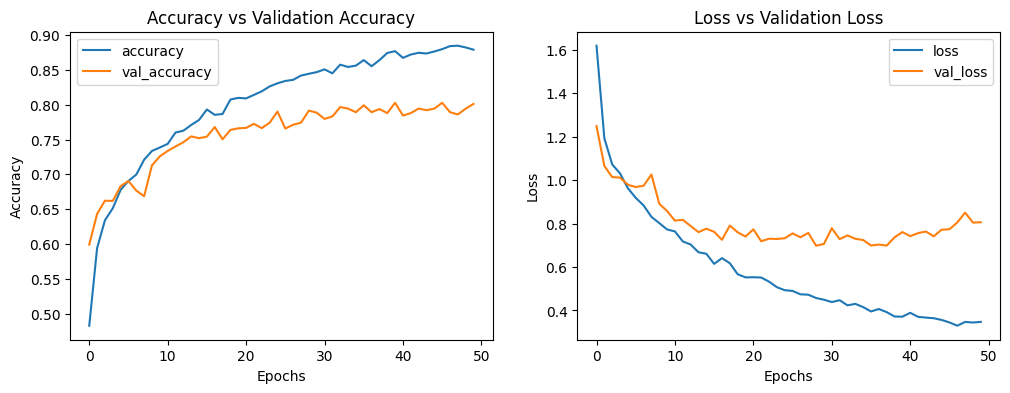

In [18]:
import matplotlib.pyplot as plt

# Get history data
history_dict = history.history

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='accuracy')
plt.plot(history_dict['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='loss')
plt.plot(history_dict['val_loss'], label = 'val_loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Saving plastik3.jpg to plastik3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


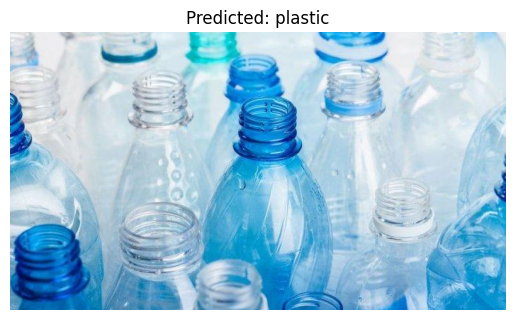

Predicted class index: 8
Predicted label: plastic


In [30]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload file
uploaded = files.upload()

# Ambil nama file pertama yang diupload
image_path = list(uploaded.keys())[0]

# Load dan preprocess gambar
img = image.load_img(image_path, target_size=(150,150))  # Sesuaikan ukuran input model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
img_array = img_array / 255.0  # Normalisasi jika diperlukan

# Prediksi
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# (Opsional) Konversi indeks ke label nama
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

# Tampilkan gambar yang diupload
plt.imshow(image.load_img(image_path))
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()

print(f"Predicted class index: {predicted_class}")
print(f"Predicted label: {predicted_label}")


In [36]:
for c in classes:
  list_file = os.listdir(curr_directory + '/garbage-dataset/garbage_classification/' + c)
  print(c + ' : ' + str(len(list_file)))

biological : 985
green-glass : 629
brown-glass : 607
battery : 945
cardboard : 891
paper : 1050
clothes : 5325
metal : 769
white-glass : 775
shoes : 1977
trash : 697
plastic : 865


In [39]:
import shutil

for c in classes:
  list_file = os.listdir(curr_directory + '/garbage-dataset/garbage_classification/' + c)

  for d in data:
    directory = os.listdir(curr_directory + '/garbage-dataset/garbage_classification/' + d + '/' + c)
    print(d + ' in ' + c + ' : ' + str(len(directory)))
  print('\n')

train in biological : 591
test in biological : 197
val in biological : 197


train in green-glass : 377
test in green-glass : 125
val in green-glass : 127


train in brown-glass : 364
test in brown-glass : 121
val in brown-glass : 122


train in battery : 567
test in battery : 189
val in battery : 189


train in cardboard : 534
test in cardboard : 178
val in cardboard : 179


train in paper : 630
test in paper : 210
val in paper : 210


train in clothes : 3195
test in clothes : 1065
val in clothes : 1065


train in metal : 461
test in metal : 153
val in metal : 155


train in white-glass : 465
test in white-glass : 155
val in white-glass : 155


train in shoes : 1186
test in shoes : 395
val in shoes : 396


train in trash : 418
test in trash : 139
val in trash : 140


train in plastic : 519
test in plastic : 173
val in plastic : 173




In [33]:
label = os.listdir(curr_directory + '/garbage-dataset/garbage_classification')

print(label)

['biological', 'green-glass', 'brown-glass', 'train', 'battery', 'cardboard', 'test', 'paper', 'clothes', 'metal', 'val', 'white-glass', 'shoes', 'trash', 'plastic']
